In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [2]:
path = 'D:\work\Te Data task\Retail Data Analytics - Data'
sales = pd.read_csv(path+'\sales data-set.csv')
store = pd.read_csv(path+'\stores data-set.csv')
features = pd.read_csv(path+'\Features data set.csv')

In [3]:
df = sales.merge(features,how="left", on=['Store', 'Date', 'IsHoliday'])
df = df.merge(store, how= "left", on=['Store'])
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,05/02/2010,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,12/02/2010,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,19/02/2010,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,26/02/2010,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,05/03/2010,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


In [4]:
df.fillna(0,inplace=True)

In [5]:
df['IsHoliday'] = df['IsHoliday'].map({True:1,False:0})

In [6]:
X = df[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']]
y = df['IsHoliday'] 

In [7]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [10]:
rf = RandomForestClassifier(random_state=42, class_weight='balanced')
rf.fit(x_train , y_train)
y_pred= rf.predict(x_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     81883
           1       0.41      1.00      0.58      2431

    accuracy                           0.96     84314
   macro avg       0.70      0.98      0.78     84314
weighted avg       0.98      0.96      0.97     84314



Text(0, 0.5, 'Mean decrease in impurity')

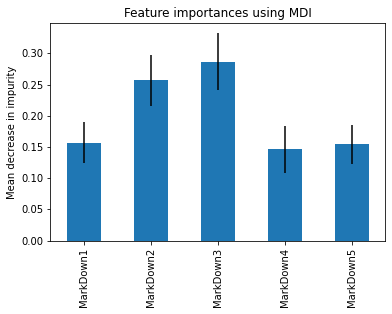

In [11]:
importances = rf.feature_importances_
forest_importances = pd.Series(importances, index=X.columns)
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")

# here we can find that markdown3 & markdown2 have big importance in the model and the main target from this notebook is to prove that markdown affect the holidays  , and it show that we can predict holiday if we have the markdown